In [1]:
%matplotlib inline
import pandas as pd

### Download data 

In [2]:
# month_ends = pd.date_range(start='1995-12-31', end=pd.datetime.today(), freq='M')
# month_starts = month_ends + pd.Timedelta('1d')
# month_ends = month_ends[1:]
# month_starts = month_starts[:-1]

# tides = pd.DataFrame()
# for start, end in zip(month_starts, month_ends):
#     start_str = f'{start.year}{start.month:02d}{start.day:02d}'
#     end_str = f'{end.year}{end.month:02d}{end.day:02d}'
    
#     print(f'downloading from {start_str} to {end_str}')
    
#     df = pd.read_csv(f'https://tidesandcurrents.noaa.gov/api/datagetter?product=water_level'+
#                 f'&application=NOS.COOPS.TAC.WL&begin_date={start_str}&end_date={end_str}&'+
#                 f'datum=MLLW&station=9415020&time_zone=lst&units=metric&format=csv', index_col=0)
    
#     tides = pd.concat([tides, df])

# tides.index = pd.to_datetime(tides.index)
# tides.to_csv(f'point_reyes_tides_{start_str}_{end_str}.csv.gz', compression='gzip')

### Load data from disk 

In [3]:
tides = pd.read_csv('point_reyes_tides_20180101_20180131.csv.gz', parse_dates=[0], index_col=0, usecols=[0,1,7])

I couldn't find the specification of the data. I assume the Quality field (which has values "p" and "v") stands
for "preliminary" and "verified". I discard preliminar data.

In [4]:
water_level = tides[tides[' Quality '] == 'v'][' Water Level']
del tides

## Baseline 

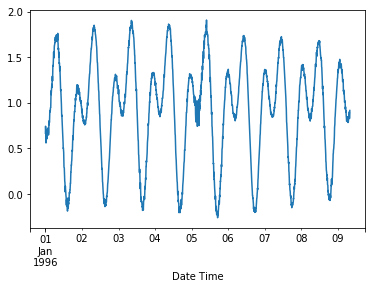

In [22]:
water_level[:2000].plot()

In [5]:
import npts
import numpy as np

In [6]:
# import datetime

# class LunarPhase(npts.features.Feature):

#     def __init__(self, n_periods = 8, **kwargs):
#         super().__init__(**kwargs)
#         self.n_periods = n_periods
        
#     def lunations(self, timestamp): 
#         """Lunations since Jan 1, 2001."""
#         diff = timestamp - datetime.datetime(2001, 1, 1)
#         days = diff.days + diff.seconds / 86400
#         return 0.20439731 + days * 0.03386319269

#     def indexer(self, index, column=None):
#         lunations = self.lunations(index)
#         return (np.floor(self.n_periods*lunations + .5).astype(int) % self.n_periods)

In [9]:
test = water_level[-len(water_level)//20:]
train = water_level[:-len(water_level)//20]

In [67]:
baseline = npts.Baseline(npts.IntervalOfDay('6min', lambdas=np.logspace(-9,-4, 3)), 
                         npts.DayOfYear(lambdas=np.logspace(-7,-3, 3)), 
                         npts.LunarPhase(n_periods=16, lambdas=np.logspace(-16,-3, 3)))

Building baseline with 1405440 =  240*366*16 values.
building reg matrices


In [68]:
baseline.fit(train)

Fitting on 1821477 observations, of dimension 1
Train set: 1456643 obs. Test set : 364834 obs.
Making quadratic loss term for 1456643 obs.
Making quadratic loss term for 364834 obs.
Provided lambdas: [array([1.00000000e-09, 3.16227766e-07, 1.00000000e-04]), array([1.e-07, 1.e-05, 1.e-03]), array([1.00000000e-14, 3.16227766e-09, 1.00000000e-03])]
working with lambda (1e-09, 1e-07, 1e-14)
solving with λ=(1e-09, 1e-07, 1e-14)
CG took 1.175879955291748 seconds.
(364834, 1)
(1456643, 1)
Tr. cost: 7.648e-03, val. cost: 3.995e-02
working with lambda (1e-09, 1e-07, 3.1622776601683795e-09)
solving with λ=(1e-09, 1e-07, 3.1622776601683795e-09)
CG took 0.05470085144042969 seconds.
(364834, 1)
(1456643, 1)
Tr. cost: 7.648e-03, val. cost: 3.995e-02
working with lambda (1e-09, 1e-07, 0.001)
solving with λ=(1e-09, 1e-07, 0.001)
CG took 2.2793328762054443 seconds.
(364834, 1)
(1456643, 1)
Tr. cost: 1.871e-01, val. cost: 2.065e-01
working with lambda (1e-09, 1e-05, 1e-14)
solving with λ=(1e-09, 1e-05, 

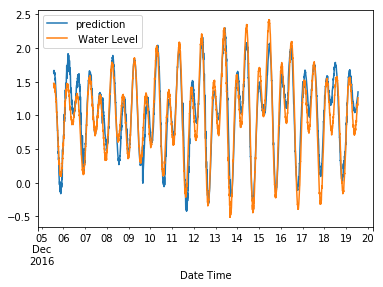

In [85]:
poll = 1823477
win_len = 240*14
window = water_level[poll:poll+win_len]
baseline.predict(window.index).plot(label='prediction', )
window.plot()
plt.legend()

In [71]:
baseline.theta.shape

(1405440, 1)

In [72]:
test_pred = baseline.predict(test.index)

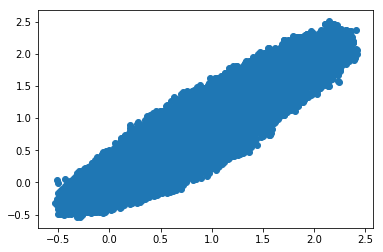

In [86]:
import matplotlib.pyplot as plt
plt.scatter(test, test_pred)

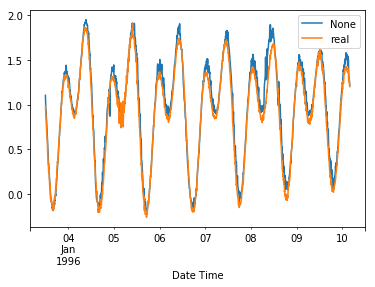

In [90]:
pd.Series(baseline.predict(water_level[600:2200].index), water_level[600:2200].index).plot()
water_level[600:2200].plot(label='real')
plt.legend()

In [33]:
baseline.tr_costs

{(1.0, 1.0, 1.0): 0.039184369101146935,
 (1.000000000000003,
  1.000000000000001,
  0.9999999999999748): 0.039184369101146935,
 (1.0000000000000053,
  1.0000000000000018,
  0.9999999999999548): 0.039184369101146935,
 (1.0000000000000142,
  1.0000000000000049,
  0.9999999999998804): 0.039184369101146935,
 (1.0000000000000677,
  1.0000000000000233,
  0.9999999999994332): 0.039184369101146935,
 (1.0000000000003213,
  1.0000000000001106,
  0.9999999999973136): 0.039184369101146935,
 (1.0000000000015226,
  1.0000000000005242,
  0.9999999999872672): 0.039184369101146935,
 (1.000000000007217,
  1.0000000000024847,
  0.9999999999396488): 0.039184369101146935,
 (1.0000000000342064,
  1.000000000011777,
  0.9999999997139478): 0.039184369101146935,
 (1.0000000001621319,
  1.0000000000558207,
  0.99999999864417): 0.039184369101146935,
 (1.0000000007684722,
  1.0000000002645792,
  0.9999999935736376): 0.039184369101146935,
 (1.000000003642404,
  1.0000000012540522,
  0.9999999695403309): 0.03918436

In [ ]:
def plot_RMSE(cost_dict, title):
    fig = plt.figure(figsize=(8,4))
    cax = plt.hexbin(*np.array([[*np.log(k), np.sqrt(v)] for k, v 
                          in cost_dict.items()]).T,
              gridsize=10)
    axc = fig.colorbar(cax, ax=fig.gca(), shrink=.7)
    plt.plot(*np.log(baseline.best_lambda), 'ro', markersize=10)
    plt.xlabel('log(λ_day)')
    plt.ylabel('log(λ_annual)')
    plt.title(title)
    
plot_RMSE(baseline.val_costs, 'test')
plot_RMSE(baseline.tr_costs, 'train')

In [64]:
import datetime

class LunarPhase(npts.features.Feature):

    def __init__(self, n_periods = 8, **kwargs):
        super().__init__(**kwargs)
        self.n_periods = n_periods
        
    def lunations(self, timestamp): 
        """Lunations since Jan 1, 2001."""
        diff = timestamp - datetime.datetime(2001, 1, 1)
        days = diff.days + diff.seconds / 86400
        return 0.20439731 + days * 0.03386319269

    def indexer(self, index, column=None):
        lunations = self.lunations(index)
        return (np.floor(self.n_periods*lunations + .5).astype(int) % self.n_periods)
    
    
# def phase(pos): 
#    index = (pos * dec(8)) + dec("0.5")
#    index = math.floor(index)
#    return {
#       0: "New Moon", 
#       1: "Waxing Crescent", 
#       2: "First Quarter", 
#       3: "Waxing Gibbous", 
#       4: "Full Moon", 
#       5: "Waning Gibbous", 
#       6: "Last Quarter", 
#       7: "Waning Crescent"
#    }[int(index) & 7]

In [63]:
np.floor(-12.2).astype(int)

-13

In [65]:
LunarPhase().indexer(water_level[600:1200].index)

Int64Index([3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
            ...
            4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
           dtype='int64', name='Date Time', length=600)

## Experiments 

In [27]:
import scipy.sparse as sp
import numpy as np

In [32]:
a = np.arange(1000.)
b = np.arange(1000.)

In [33]:
%timeit a*b

960 ns ± 50.4 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [38]:
%timeit sp.diags(a)@b

65.3 µs ± 2.09 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [40]:
%timeit c = np.array(a)

593 ns ± 22.4 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [41]:
%timeit c = np.array(a, copy=False)

166 ns ± 4.21 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [42]:
d = np.array([1,2])

In [43]:
%timeit e = np.array(d)

408 ns ± 17.7 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [44]:
%timeit e = np.array(d, copy=False)

155 ns ± 2.16 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [45]:
%timeit e = d

22.2 ns ± 0.931 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
